In [54]:
# Step 1: Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

In [55]:
# Load dataset
data = pd.read_csv("./load_data.csv")

In [56]:
data

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.000000,0.0,73.210000,100.00,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.000000,0.0,66.770000,100.00,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.000000,0.0,70.280000,100.00,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.000000,0.0,68.090000,100.00,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.000000,0.0,133.655666,NaN,4500.000000,Light_Load
...,...,...,...,...,...,...,...,...,...
35036,31-12-2018 23:15,3.740000,3.74,0.000000,0.0,70.710000,100.00,83700.000000,Light_Load
35037,31-12-2018 23:30,3.780000,3.17,0.070000,0.0,76.620000,99.98,157160.395291,Light_Load
35038,31-12-2018 23:45,3.780000,3.06,0.110000,0.0,187.054285,99.96,85500.000000,Light_Load
35039,31-12-2018 00:00,3.670000,3.02,0.174801,0.0,77.220000,NaN,0.000000,Light_Load


In [57]:
# Handle missing values if any
data.dropna(inplace=True)

In [58]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format="%d-%m-%Y %H:%M")

# Extract date features
data['Year'] = data['Date_Time'].dt.year
data['Month'] = data['Date_Time'].dt.month
data['Day'] = data['Date_Time'].dt.day
data.drop('Date_Time', axis=1, inplace=True) 

In [59]:
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Year,Month,Day
0,8.753692,2.95,0.00,0.0,73.210000,100.00,900.000000,Light_Load,2018,1,1
1,4.000000,4.46,0.00,0.0,66.770000,100.00,1800.000000,Light_Load,2018,1,1
2,3.240000,3.28,0.00,0.0,70.280000,100.00,8070.880991,Light_Load,2018,1,1
3,3.310000,3.56,0.00,0.0,68.090000,100.00,3600.000000,Light_Load,2018,1,1
5,3.280000,3.56,0.00,0.0,67.760000,100.00,5400.000000,Light_Load,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
35034,3.820000,4.54,0.00,0.0,64.380000,100.00,81900.000000,Light_Load,2018,12,31
35035,3.850000,4.86,0.00,0.0,62.100000,100.00,82800.000000,Light_Load,2018,12,31
35036,3.740000,3.74,0.00,0.0,70.710000,100.00,83700.000000,Light_Load,2018,12,31
35037,3.780000,3.17,0.07,0.0,76.620000,99.98,157160.395291,Light_Load,2018,12,31


In [60]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Load_Type'] = label_encoder.fit_transform(data['Load_Type'])

In [61]:
# Split data into features (X) and target variable (y)
X = data.drop('Load_Type', axis=1)
y = data['Load_Type']

In [62]:
# Split data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [63]:
# Step 4: Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [64]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Confusion Matrix
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix (Validation Set):")
print(conf_matrix_val)


Confusion Matrix (Validation Set):
[[2897   19   51]
 [  20 1204   50]
 [  43   34 1518]]


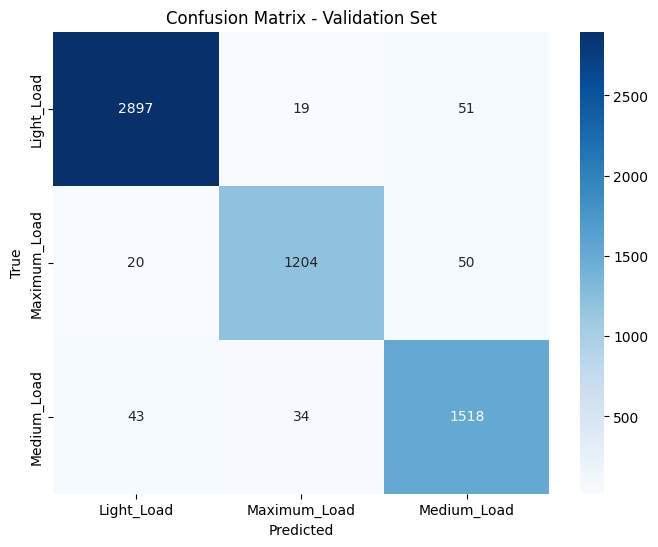

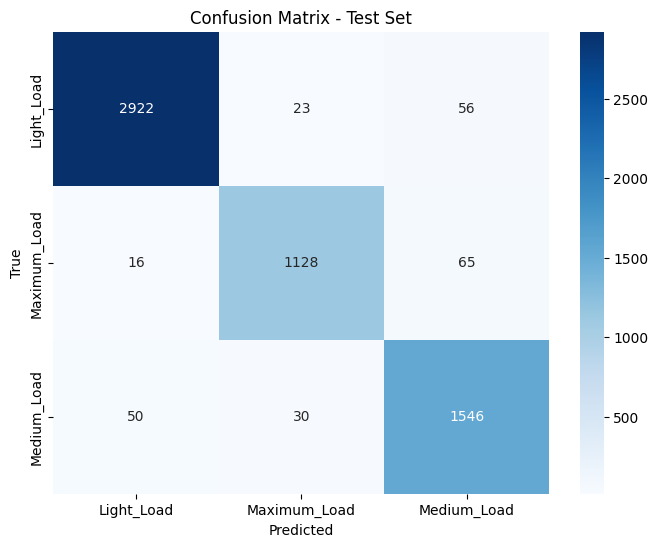

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Step 6: Testing - continued
# Evaluate on test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [67]:
# Step 5: Model Evaluation
# Evaluate on validation set
y_val_pred = rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Validation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Validation Metrics:
Accuracy: 0.9628169979437972
Precision: 0.9629251967137747
Recall: 0.9628169979437972
F1 Score: 0.9628466373686669


In [68]:
# Evaluate on test set
y_test_pred = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)



Test Metrics:
Accuracy: 0.9588759424263193
Precision: 0.959121366341547
Recall: 0.9588759424263193
F1 Score: 0.9589288864855341


In [69]:
filename = 'model.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))